In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "path_to_your_dataset.csv"  # Replace with the actual dataset path
df = pd.read_csv('train.csv')

# Drop rows with missing values for simplicity (or handle them properly)
df = df.dropna()
df=df.drop('Loan_ID',axis=1)  
x= df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area']]
y = df['Loan_Status']

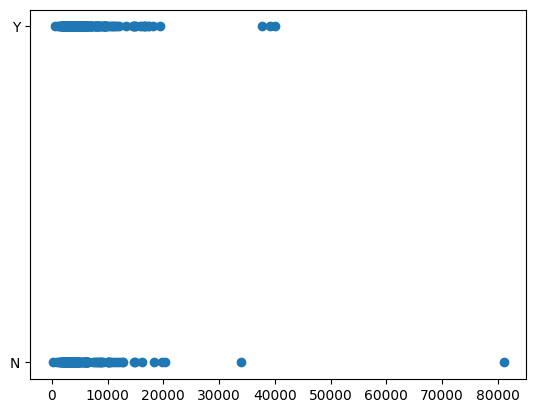

In [35]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
label_encoder  = LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])
x['Married'] = label_encoder.fit_transform(x['Married'])
x['Education'] = label_encoder.fit_transform(x['Education'])
x['Self_Employed'] = label_encoder.fit_transform(x['Self_Employed'])
x['Property_Area'] = label_encoder.fit_transform(x['Property_Area'])


C:\Users\alans\AppData\Local\Temp\ipykernel_2488\3481400398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = label_encoder.fit_transform(x['Gender'])
C:\Users\alans\AppData\Local\Temp\ipykernel_2488\3481400398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Married'] = label_encoder.fit_transform(x['Married'])
C:\Users\alans\AppData\Local\Temp\ipykernel_2488\3481400398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y , test_size=0.2)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scaled = scaler.transform(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = X_train_scaled
X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = X_test_scaled


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance (accuracy)
print("Accuracy:", accuracy_score(Y_test, y_pred)*100)

Accuracy: 90.72164948453609


In [38]:
import numpy as np

# Add noise to the numerical features
np.random.seed(42)  # Set seed for reproducibility
noise_factor = 0.8  # Adjust the noise factor (higher means more noise)

# Add random noise to the numerical features
X_train_noisy = X_train.copy()
X_test_noisy = X_test.copy()

X_train_noisy[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] += noise_factor * np.random.randn(*X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].shape)
X_test_noisy[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] += noise_factor * np.random.randn(*X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].shape)

# Train the model on noisy data
model.fit(X_train_noisy, Y_train)

# Predict on the noisy test set
y_pred_noisy = model.predict(X_test_noisy)

# Evaluate performance (accuracy) on noisy data
from sklearn.metrics import accuracy_score
accuracy_noisy = accuracy_score(Y_test, y_pred_noisy)
print("Accuracy with added noise:", accuracy_noisy)


Accuracy with added noise: 0.8865979381443299


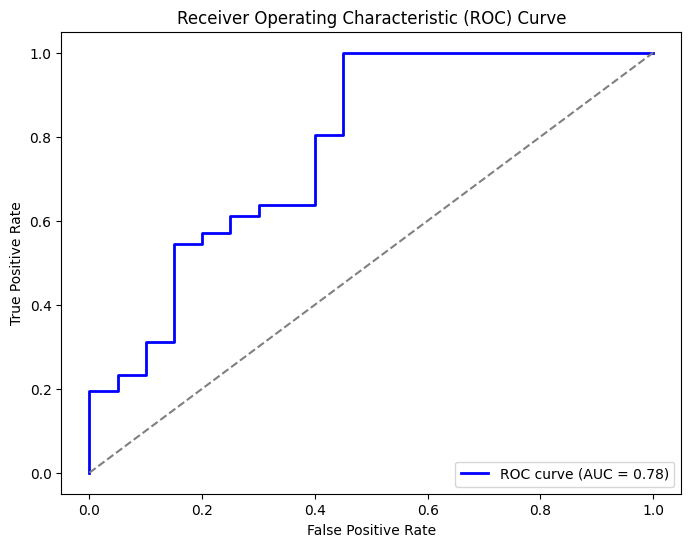

AUC score: 0.78


In [41]:
# Convert 'Y'/'N' to 1/0
y_test_binary = Y_test.map({'Y': 1, 'N': 0})

# Predict probabilities for the test set (needed for ROC curve)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)

# Compute ROC curve and AUC score
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC score: {roc_auc:.2f}")
